# Applied Machine Learning (2021), exercises


## General instructions for all exercises

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Follow the instructions and fill in your solution under the line marked by tag

> YOUR CODE HERE

Do not change other areas of the document, since it may disturb the autograding of your results!
  
Having written the answer, execute the code cell by and pressing `Shift-Enter` key combination. The code is run, and it may print some information under the code cell. The focus automatically moves to the next cell and you may "execute" that cell by pressing `Shift-Enter` again, until you have reached the code cell which tests your solution. Execute that and follow the feedback. Usually it either says that the solution seems acceptable, or reports some errors. You can go back to your solution, modify it and repeat everything until you are satisfied. Then proceed to the next task.
   
Repeat the process for all tasks.

The notebook may also contain manually graded answers. Write your manualle graded answer under the line marked by tag:

> YOUR ANSWER HERE

Manually graded tasks may be text, pseudocode, or mathematical formulas. You can write formulas with $\LaTeX$-syntax by enclosing the formula with dollar signs (`$`), for example `$f(x)=2 \pi / \alpha$`, will produce $f(x)=2 \pi / \alpha$

When you have passed the tests in the notebook, and you are ready to submit your solutions, download the whole notebook, using menu `File -> Download as -> Notebook (.ipynb)`. Save the file in your hard disk, and submit it in [Moodle](https://moodle.uwasa.fi) under the corresponding excercise.

Your solution should be an executable Python code. Use the code already existing as an example of Python programing and read more from the numerous Python programming material from the Internet if necessary. 


In [1]:
NAME = "Duc Hoang Nguyen"
Student_number = "d120411"

---

# Unsupervised learning, projections

## Task 1: Apply k-means

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # for plot styling

The data-file `liver-spectroscopy.tab` is a text file which contains a Near Infrared Spectral (NIR) measurements of different cells from a liver. The file includes 731 samples, and each one has 234 variables. The variables describes the amount of infrared radiation absorbed in each of the tested 234 wavelengths. The last column in the data is the cell type, which can be one of the four types: 'collagen', 'glycogen', 'lipids' or 'DNA'. The column names are the wavelengths used in measuring the absorbtion values for the specific columns.

In [3]:
D = pd.read_table('liver-spectroscopy.tab')

# Print the classes
print(D.type.unique())

# Separate the true classes out from the data, into separate variable
types=pd.Categorical(D.type)
del(D['type'])

['collagen' 'glycogen' 'lipids' 'DNA']


First task is to apply PCA to transform the data `D` to PCA projection `projected`. Then apply KMeans to `projected` and try to find clusters from the data. Use just enough PCA-components to contain more than 90% of the variance. Name your KMeans object as `kmeans`.

Plot the clusters with different colors in the scatter plot using PC1 and PC2 axis.

[0.64024105 0.84289211 0.90642239]


Text(0, 0.5, 'PC2')

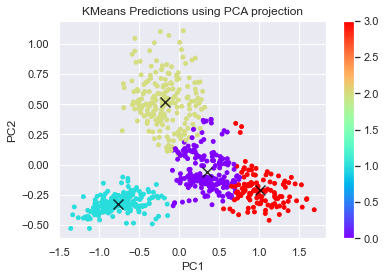

In [45]:
# YOUR CODE HERE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca=PCA(n_components=3)
projected=pca.fit_transform(D)
# Check the cumulative variance explained by the first i+1 dimensions
print(pca.explained_variance_ratio_.cumsum())

kmeans = KMeans(n_clusters=4, random_state = 4)
kmeans.fit(projected)
y_kmeans = kmeans.predict(projected)
centers_kmeans = kmeans.cluster_centers_

# Plot the data
plt.scatter(projected[:, 0], projected[:, 1], c=y_kmeans, s=15, cmap='rainbow')
plt.colorbar()
plt.scatter(centers_kmeans[:, 0], centers_kmeans[:, 1], c='black', s=100, alpha=0.8, marker='x');
plt.title('KMeans Predictions using PCA projection')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [46]:
assert(kmeans.cluster_centers_.shape==(4,3))
assert(projected.shape==(731,3))
assert(abs(kmeans.inertia_-75)<5)

## Task 2, apply PCA and GMM

Use previous PCA projection and apply Gaussian Mixture Model to projected data and try to find clusters from the data. Use `gmm` as a name for GaussianMixture object.

Plot the clusters with different colors in the scatter plot using PC1 and PC2 axis.

Text(0, 0.5, 'PC2')

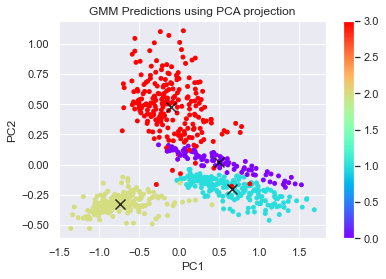

In [47]:
# YOUR CODE HERE
from sklearn.mixture import GaussianMixture

# Fit the model
gmm = GaussianMixture(n_components=4, random_state = 1)
gmm.fit(projected)
# Predict clusters
y_gmm = gmm.predict(projected)
centers_gmm = gmm.means_
# Plot the data
plt.scatter(projected[:, 0], projected[:, 1], c=y_gmm, s=15, cmap='rainbow')
plt.colorbar()
plt.scatter(centers_gmm[:, 0], centers_gmm[:, 1], c='black', s=100, alpha=0.8, marker='x');
plt.title('GMM Predictions using PCA projection')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [48]:
assert(projected.shape==(731,3))
assert(abs(gmm.bic(projected)+269)<10)

## Task 3: Confusion matrix

Calculate the confusion matrix `CM` between the clusters and true tissue types. Find from `CM`, the number of the cluster where *DNA* tissue type samples are most often assigned. Assign in variable `nDNA` the number of times the samples of tissue type *DNA* were assigned into this cluster.

Some instructions

1. Find the category number of DNA ny listing `types.categories`. The category number is the index of string 'DNA' in the list of categories.
1. Use `CM=confusion_matrix)=` -function from `sklearn.metrics` to plot the confusion matrix
1. Assign the found number in variable `nDNA`


In [56]:
types.categories

Index(['DNA', 'collagen', 'glycogen', 'lipids'], dtype='object')

PCA & KMeans
[[ 65   0  11  34]
 [113   0   0  82]
 [  8 204   0   0]
 [ 19   0 192   3]]
PCA & GMM
[[ 91  12   0   7]
 [  1 192   0   2]
 [  0   0 211   1]
 [  2   0   0 212]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.89       110
           1       0.94      0.98      0.96       195
           2       1.00      1.00      1.00       212
           3       0.95      0.99      0.97       214

    accuracy                           0.97       731
   macro avg       0.97      0.95      0.96       731
weighted avg       0.97      0.97      0.97       731



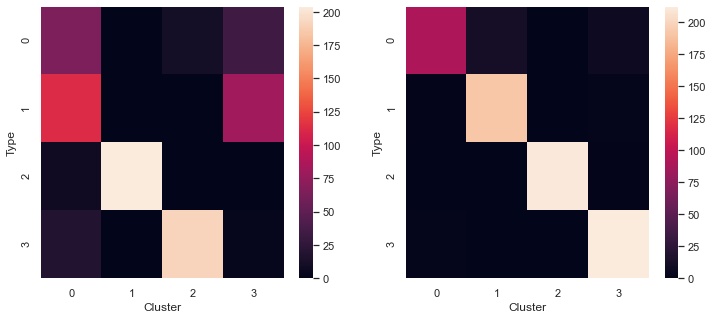

In [50]:
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm_kmeans = confusion_matrix(types.codes, y_kmeans)
cm_gmm = confusion_matrix(types.codes, y_gmm)

print("PCA & KMeans")
print(cm_kmeans)
print("PCA & GMM")
print(cm_gmm)
print(classification_report(types.codes, y_gmm))

# Visualize two confusion matrix as heatmaps
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.heatmap(cm_kmeans, ax=ax1)
ax1.set_xlabel('Cluster')
ax1.set_ylabel('Type')
sns.heatmap(cm_gmm, ax=ax2)
ax2.set_xlabel('Cluster')
ax2.set_ylabel('Type')

# Calculate the number of the cluster where DNA tissue type samples are most often assigned with PCA & GMM
index_DNA = types.categories.tolist().index('DNA')
nDNA = np.max(cm_gmm, axis = 1)[index_DNA]

In [51]:
assert(nDNA==91)

## Task 3: The probability of the samples

The GMM model includes the function called `.predict_proba()` which returns the probability that a certain sample belongs to different clusters. Calculate the probabilities of each sample belongin to each cluster and assign the result in variable `P`. Then find out the proability that the last sample belongs in the cluster where most DNA samples belong to, and assign that probability in variable `pDNA`.

In [52]:
# YOUR CODE HERE
P = gmm.predict_proba(projected)
# Find from GMM confusion matrix the cluster to which most DNA samples are assigned.
cluster_DNA, label_DNA = np.where(cm_gmm == nDNA)
print(f'Cluster code of DNA is {cluster_DNA[0]}')
# Get index of the last sample belongs to the same cluster with DNA
idx_last_sample = np.where(y_gmm == cluster_DNA)[0][-1]
print(f'Last sample which belongs to the same cluster of DNA has the index of {idx_last_sample}')

pDNA = P[idx_last_sample][cluster_DNA[0]]
print(f'pDNA = {pDNA}')

Cluster code of DNA is 0
Last sample which belongs to the same cluster of DNA has the index of 730
pDNA = 0.9956723347488678


In [53]:
assert(abs(pDNA-0.995)<0.001)

## Task 4: Evaluation

1. Which clustering method, KMeans or GMM is better for this case and why?
1. How can the quality of the clustering methods be assessed if 
    1. the true classes are known?
    1. the true classes are not known?
    
Answer by writing text or Markdown text in the cell below.

YOUR ANSWER HERE

1. In this case, the GMM seems to give a better precision than the KMeans does. According to the confusion matrix, KMeans put data points of type0 (DNA) and type1 (collagen) (65 and 113 data points, respectively) into the same cluster 0, while it can not clearly distinguish between cluster 0 and 4 for the data points of type1 (collagen). On the other hands, accuracy of the GMM method is 0.97, meaning more than 97% of the data points are classified into the correct clusters.


2. Assessing the quality of the clustering methods
    
    A. If the true classes are known, we can evaluate the quality of the model based on the confusion matrix which shows the counts of test records correctly and incorrectly predicted. From the confusion matrix, we can then calculate other importants quality indicators: Recall, Precision, Accuracy, and finally draw ROC Curve to assess performance of the model.
    
    B. It is much harder to assess the quality of the model when we do not have the ground truth of our data set. We could use within-cluster measure (Are data points are well-spaced and densed in a cluster?) or between-clusters measure (Are clusters spead out or close to each other). We could use Davies-Bouldin Index or Dunn Index to measure within-cluster metrics, and Between Clusters Sum of Squares to measure between-clusters metrics.